<a href="https://colab.research.google.com/github/sunshineluyao/CV_XAI/blob/master/MachineLearning/DecisionTrees13Jan2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Authenticated


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
clf = DecisionTreeClassifier()

In [ ]:

###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/btc_Kmeans_2020_12_31.csv',index_col='Unnamed: 0')
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2020-12-27,1049825.0,148.0,193716651.0,1.308896e+06,3.033870,4.911576e+11,1.618915e+11,1.866826e+13,0.000295,7.792538,0.000158,4.162860,89.698259,2.370802e+06,1.373446e+08,925.0,1.816875,2.444854e+07,925.0,2.444854e+07,76.839437,114.994093,1.0,26430.856597,261.737332,54.551925,1.858273e+07,2.056073e+07,1.449817e+07,304240.0,808638.0,241838.497017,6.391999e+09,0.657102,17367.771562,0.005215,137.846432,531357.733666,1.404424e+10,0.027924,0.034667,0.034255,4.905674e+10,1.751811,5.544874e+10,8.238012,2.681934e+07,2.100175e+10,50.174128,1.102133e+12,2.398156,0.017810,0.121826,0.112338,0.063885,0.089066,0.123253,0.132847,0.090978,0.028995,0.118794,0.100206,0.595074,0.471821,0.338974,0.247995,0.219001,0.100206,279.837598,94.450699,0.034667,0.034255,0.030030,0.027924,487.366929,54.231945,NaN,NaN,NaN,54.551925,98.872856,146.386991,189.052387,NaN,NaN,NaN,NaN
2020-12-28,1154354.0,160.0,206766595.0,1.292291e+06,3.033361,5.024921e+11,1.656552e+11,1.859959e+13,0.000327,8.834168,0.000164,4.436346,102.752936,2.778372e+06,1.479345e+08,1000.0,1.964065,2.703935e+07,1000.0,2.703935e+07,46.737221,115.311281,1.0,27039.349020,265.812917,52.374044,1.858373e+07,2.056098e+07,1.449831e+07,314503.0,874761.0,397621.711422,1.075143e+10,0.809730,21894.585318,0.005513,149.061442,708320.652738,1.915253e+10,0.027950,0.034447,0.034285,4.526595e+10,1.754172,5.601738e+10,8.071835,2.981772e+07,2.103157e+10,46.170214,1.332533e+12,2.029169,0.021149,0.127496,0.111604,0.063451,0.083734,0.121085,0.132213,0.091246,0.028996,0.118805,0.100221,0.592565,0.471481,0.339268,0.248022,0.219026,0.100221,272.669458,99.165301,0.034447,0.034285,0.030060,0.027950,474.438581,56.992307,NaN,NaN,NaN,52.374044,100.659837,149.414196,192.591228,NaN,NaN,NaN,NaN
2020-12-29,1146131.0,152.0,194179955.0,1.277500e+06,3.006909,5.060833e+11,1.683068e+11,1.859959e+13,0.000313,8.530911,0.000164,4.470274,104.816233,2.854272e+06,1.405378e+08,950.0,1.865880,2.586964e+07,950.0,2.586964e+07,54.785860,114.333016,1.0,27231.203455,276.673228,49.697118,1.858468e+07,2.056122e+07,1.449554e+07,334580.0,924443.0,339224.096073,9.237480e+09,0.765763,20852.655461,0.005631,153.351433,707904.496552,1.927709e+10,0.027902,0.034408,0.034289,5.128744e+10,1.754900,6.052492e+10,8.052861,2.872392e+07,2.106029e+10,48.270913,1.313616e+12,2.072995,0.019785,0.135661,0.105108,0.064458,0.082931,0.120875,0.131812,0.091394,0.028982,0.118768,0.100227,0.592058,0.471183,0.339371,0.247977,0.218996,0.100227,271.682580,100.231688,0.034408,0.034289,0.030010,0.027902,473.544137,57.505101,NaN,NaN,NaN,49.697118,100.180921,152.787915,199.428676,NaN,NaN,NaN,NaN
2020-12-30,1221579.0,172.0,215838093.0,1.254873e+06,3.148488,5.360990e+11,1.702719e+11,1.859959e+13,0.000315,9.091743,0.000171,4.940794,107.456738,3.099548e+06,1.590296e+08,1075.0,2.111160,3.100796e+07,1075.0,3.100796e+07,55.434481,119.111340,1.0,28844.613678,30

In [ ]:
X=df[['PU Ratio','future180d_ROI']].dropna()
X.head()

,PU Ratio,future180d_ROI
2010-10-15,0.463068,786.019103
2010-10-16,0.418963,888.742343
2010-10-17,0.434969,864.385428
2010-10-18,0.432914,922.102400
2010-10-19,0.391364,1025.760741


In [ ]:
X['market status']=X['future180d_ROI'].apply(lambda x: 'bull' if x>20  else 'normal')
X.tail()

,PU Ratio,future180d_ROI,market status
2020-06-30,13.206049,189.052387,bull
2020-07-01,13.662584,192.591228,bull
2020-07-02,13.401180,199.428676,bull
2020-07-03,13.438600,218.138278,bull
2020-07-04,13.776128,218.014170,bull


In [ ]:
X.groupby('market status').count()

,PU Ratio,future180d_ROI
market status,,
bull,2240,2240
normal,1311,1311


In [ ]:
feature_names=['PU Ratio']
features=X[feature_names]
targets=X['market status']

In [ ]:
train_size = int(0.75 * features.shape[0])
train_features = features[ :train_size]
train_targets = targets[ :train_size]
test_features = features[train_size: ]
test_targets = targets[train_size: ]

In [ ]:
target_names = train_targets.unique()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.96


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

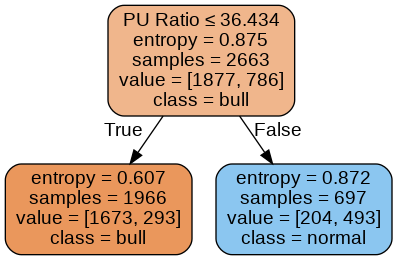

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('BTC.png')
Image(graph.create_png())